<center style="font-family:verdana; font-size:300%;">PGM Homework 2</center>
<center style="font-size:150%;">Ayman Chaouki, Otmane Sakhi</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HW2_utils import *
%matplotlib inline

In [2]:
train = np.loadtxt('EMGaussian.data')
n, p = train.shape

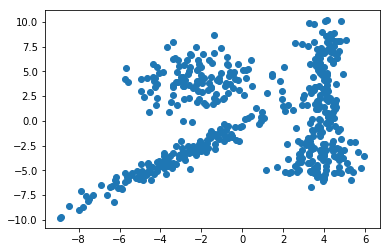

In [3]:
plt.scatter(train[:,0], train[:,1])
plt.show()

In [4]:
test = np.loadtxt('EMGaussian.test')
test.shape

(500, 2)

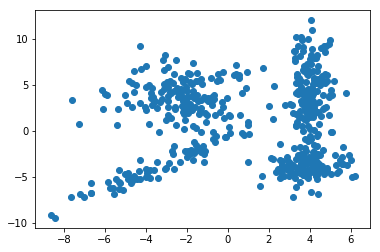

In [5]:
plt.scatter(test[:,0], test[:,1])
plt.show()

# Kmeans results

Let's try different initialisations :

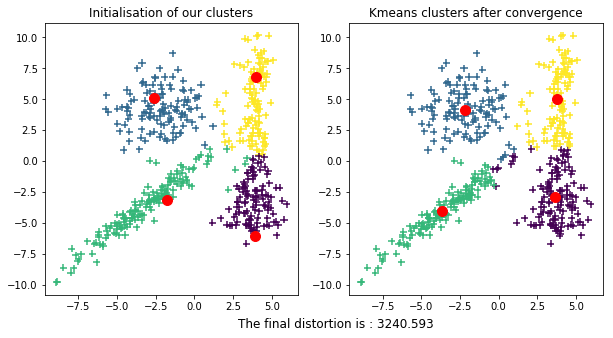

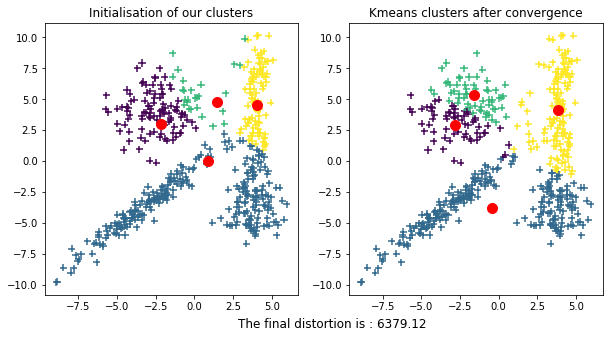

In [6]:
plot_kmeans(train, [2, 641], save=True)

Let's see if the final distortion varies a lot:

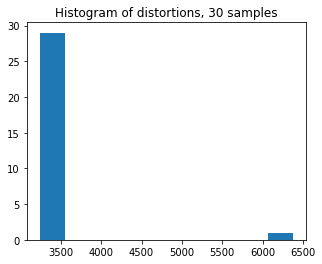

In [7]:
from gc import collect
collect()
rng = np.random.RandomState(70)
random_seeds = rng.randint(0,2**10,30)
distortions = distortion_variability(train, random_seeds)
plt.figure(figsize=(5,4))
plt.hist(distortions)
plt.title('Histogram of distortions, 30 samples')
plt.savefig('kmeans_histogram')
plt.show()

In [8]:
print('the seed with the maximum distortion is :', random_seeds[np.argmax(distortions)])

the seed with the maximum distortion is : 641


# EM Results

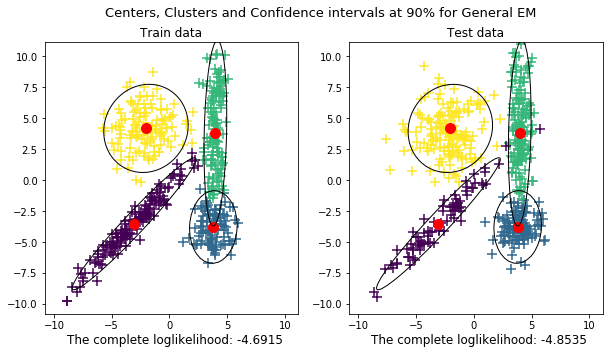

In [9]:
EM = GMM_general(4, 1)
EM.fit(train)
plot_conf_interval(train,test, EM, 90, case='General', save=True)

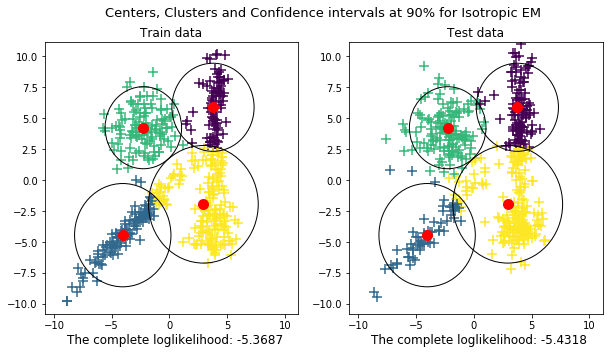

In [10]:
EM = GMM_isotropic(4, 5150)
EM.fit(train)
plot_conf_interval(train, test, EM, 90, 'Isotropic', save=True)